In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
path_procces ='../Datos/Procesados/Base_Agricola.csv'
df_agro = pd.read_csv(path_procces,sep=';')
df_agro.head()

,codDaneDpto,Dpto,codDaneMunicipio,Municipio,desagregacionCultivo,Cultivo,cicloDelCultivo,grupoCultivo,Subgrupo,Anio,Periodo,areaSembradaHa,areaCosechadaHa,produccionTon,rendimientoTonHa,nombreCientificoCultivo,codCultivo,estadoFisicoCultivo
0,15,Boyacá,15001,Tunja,Arracacha,Arracacha,Transitorio,Raíces y tubérculos,Raíces y tubérculos,2019,A,170.0,170.0,2550.0,15.0,Arracacia xanthorrhiza,1080200,En fresco
1,15,Boyacá,15001,Tunja,Arracacha,Arracacha,Transitorio,Raíces y tubérculos,Raíces y tubérculos,2020,A,150.0,150.0,3750.0,25.0,Arracacia xanthorrhiza,1080200,En fresco
2,15,Boyacá,15001,Tunja,Arracacha,Arracacha,Transitorio,Raíces y tubérculos,Raíces y tubérculos,2021,A,180.0,180.0,4500.0,25.0,Arracacia xanthorrhiza,1080200,En fresco
3,15,Boyacá,15001,Tunja,Arracacha,Arracacha,Transitorio,Raíces y tubérculos,Raíces y tubérculos,2022,A,160.0,180.0,4500.0,25.0,Arracacia xanthorrhiza,1080200,En fresco
4,15,Boyacá,15001,Tunja,Arracacha,Arracacha,Transitorio,Raíces y tubérculos,Raíces y tubérculos,2023,A,50.0,150.0,3750.0,25.0,Arracacia xanthorrhiza,1080200,En fresco


In [3]:
df_agro['grupoCultivo'] = df_agro['grupoCultivo'].str.replace('Cultivos para Condimentos y Bebidas Medicinales y Aromáticas','Condimentos Bebidas y Aromáticas')
df_agro.shape

(12265, 18)

### Creación de variable PerdidaTon
Va representar la predida segun el area sembrada y el rendimeinto por hectaria en toneladas

$$ (Area_{sembrada}-Area_{cosehada})\times RendimientoTonHa = PerdidaTon$$

In [4]:
df_agro = df_agro[df_agro['areaSembradaHa'] >= df_agro['areaCosechadaHa']]

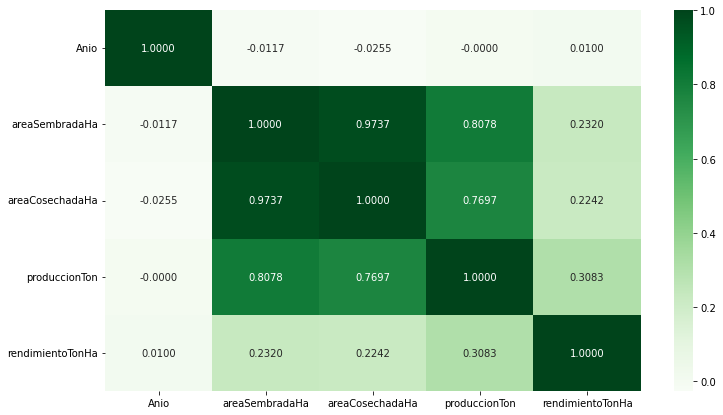

In [5]:
todo = df_agro[['Anio','areaSembradaHa','areaCosechadaHa','produccionTon','rendimientoTonHa']] # selecion de los datos para realizar una comparación son simple
tabla_agro = todo.corr()
plt.figure(figsize=(12,7))
sns.heatmap(tabla_agro,annot=True,cmap='Greens',fmt='.4f')
plt.show()

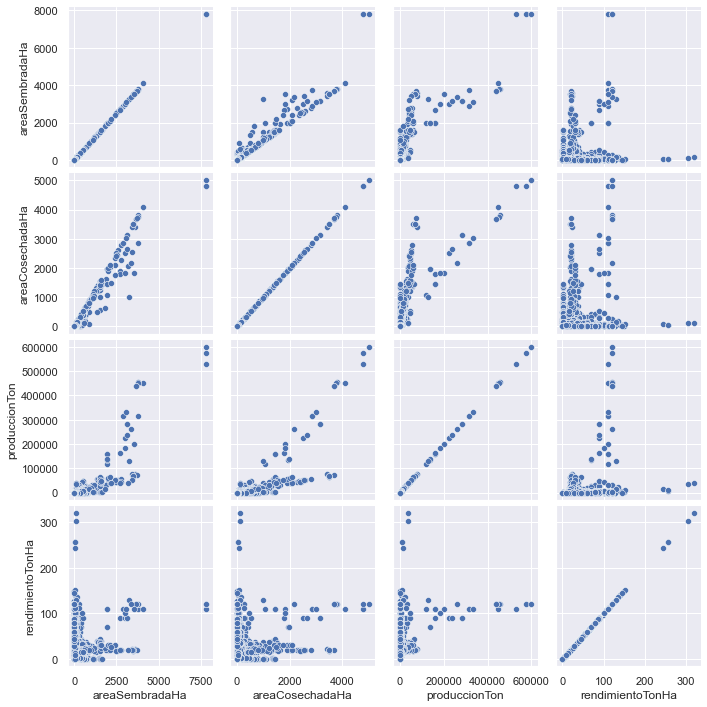

In [6]:
sns.set(rc={'figure.figsize':(7,7)})
sns.pairplot(data=todo[['areaSembradaHa','areaCosechadaHa','produccionTon','rendimientoTonHa']],diag_kind=None)
# plt.title('Grafico de dispersión entre las variables numéricas',fontsize=13)
plt.show()

In [7]:
df_agro['PerdidaTon'] = (df_agro['areaSembradaHa']-df_agro['areaCosechadaHa'])*df_agro['rendimientoTonHa']

In [10]:
df_agro['PerdidaPorcentaje'] = (df_agro['PerdidaTon']/df_agro['produccionTon'])*100

In [11]:
tabla =  df_agro.groupby(['Dpto','grupoCultivo','Anio','Periodo']).sum()
tabla.sort_values(['Dpto','areaSembradaHa'],ascending=False,inplace=True)
tablaLimpia = tabla.reset_index()
tablaLimpia

,Dpto,grupoCultivo,Anio,Periodo,codDaneDpto,codDaneMunicipio,areaSembradaHa,areaCosechadaHa,produccionTon,rendimientoTonHa,codCultivo,PerdidaTon,PerdidaPorcentaje
0,Boyacá,Cultivos tropicales tradicionales,2023,C,2115,2182981,42099.419,36858.759,2.089026e+06,3292.36,286277557,354228.4459,4123.692013
1,Boyacá,Cultivos tropicales tradicionales,2022,C,2100,2167203,41767.058,35156.778,1.913482e+06,3618.71,284247057,498595.9601,6177.982481
2,Boyacá,Cultivos tropicales tradicionales,2021,C,2100,2167203,41713.220,34224.690,1.826261e+06,2989.76,284247057,638953.3106,3868.907407
3,Boyacá,Cultivos tropicales tradicionales,2020,C,2025,2090433,36513.000,31744.500,1.648370e+06,2830.80,274095452,355115.5700,2742.271148
4,Boyacá,Cultivos tropicales tradicionales,2019,C,1995,2059419,35403.100,29494.720,1.420921e+06,2919.37,270034852,489999.2590,2173.896346
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Boyacá,Oleaginosas,2023,C,60,61715,14.300,12.800,6.370000e+01,16.80,8281800,9.0000,15.789474
69,Boyacá,"Cultivos para condimentos, bebidas medicinales...",2019,A,30,31225,3.000,2.500,4.500000e+00,4.00,2044600,0.5000,33.333333
70,Boyacá,"Cultivos para condimentos, bebidas medicinales...",2020,A,30,31225,2.200,1.700,1.700000e+00,2.00,2044600,0.5000,33.333333
71,Boyacá,"Cultivos para condimentos, bebidas medicinales...",2019,B,30,31225,2.000,2.000,1.500000e+00,1.50,2044600,0.0000,0.000000


### Creación de graficas interectivas
Graficas interactivas de [areaSembradaHa	areaCosechadaHa	produccionTon	rendimientoTonHa	Perdida], en relación al departamento, año y periodo del cultivo

In [12]:
import ipywidgets as widgets

Creación de la función de grafica

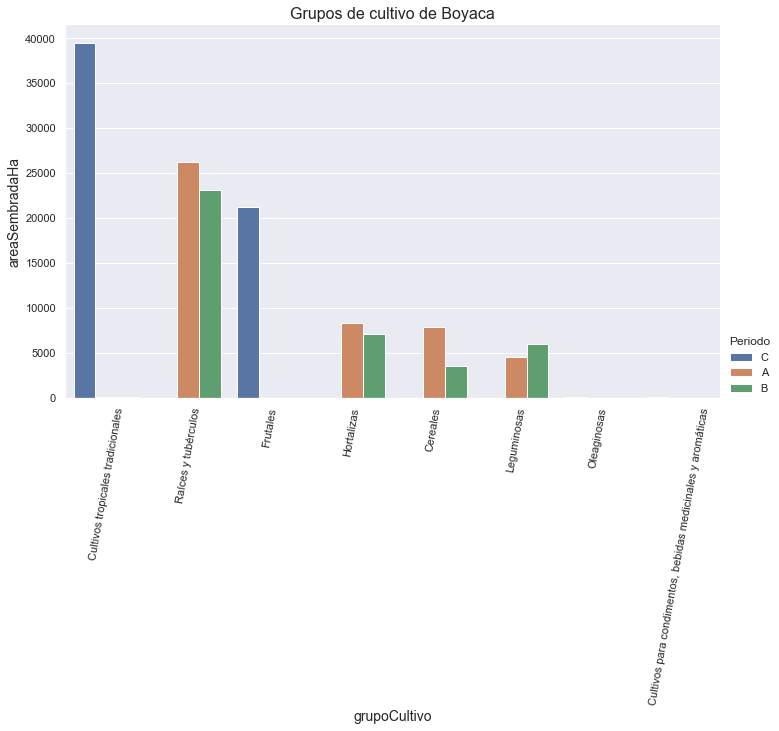

In [13]:
def grafica(categoria):
    sns.set_style("darkgrid")
    g = sns.catplot(
        data=tablaLimpia,
        x='grupoCultivo',
        y=categoria,
        hue='Periodo',
        kind='bar',
        aspect=1.7,
        errorbar=None,
        height=6
    )
    # Configurar las etiquetas y estilos
    g.set_xlabels(fontsize=14)
    g.set_ylabels(fontsize=14)
    
    lista = g.axes.flatten()  # Acceder a los gráficos generados
    
    # Solo aplicar configuraciones y mostrar el gráfico de lista[1]
    lista[0].set_title('Grupos de cultivo de Boyaca', fontsize=16)
    lista[0].tick_params(axis='x', rotation=80)  # Rotar etiquetas del eje X
    
    # Ocultar el resto de los gráficos y mostrar solo lista[1]
    for i, ax in enumerate(lista):
        if i != 0:
            ax.set_visible(False)  # Ocultar gráficos no deseados

    plt.show()

# Llamar a la función con la categoría deseada
grafica('areaSembradaHa')

Creación de la función categoria

In [14]:
categoria_Dropdown= widgets.Dropdown(
    value = 'areaSembradaHa',
    description = 'Categoria',
    options = ['areaSembradaHa','areaCosechadaHa','produccionTon'
               ,'PerdidaTon','rendimientoTonHa']
)
widgets.interact(grafica ,categoria = categoria_Dropdown)

interactive(children=(Dropdown(description='Categoria', options=('areaSembradaHa', 'areaCosechadaHa', 'producc…

<function __main__.grafica(categoria)>